In [260]:
# Імпортуємо бібліотеки для роботи
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [263]:
# Функція для виведення візуалізації
# ..узагальнемо дії, описані для S&P500
def display_info(data, bins, tail=0.15, column="Adj Close**"):

    data['Efficiency'] = (data[column] - data[column].shift(1)) / data[column]


    expected_efficiency = np.round( data['Efficiency'].mean(), 3)
    print("Expected efficiency:", expected_efficiency)

    volatility = np.round ( 
                    np.sqrt(
                        np.abs(
                            data["Efficiency"] - data["Efficiency"] ** 2).mean()
                            )
                        , 3)
    print("Volatility of efficiency:", volatility)


    confidence_intervals = [0.95, 0.99]
    VaR = [np.percentile(data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
    print("Values at Risk - 95%, 99%:", VaR)

    x_axis = np.arange(-tail, tail, 0.001)
    plt.figure(figsize=(7, 5))
    plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency,volatility**2))
    plt.hist(data['Efficiency'], bins=bins)
    for _, interval in enumerate(confidence_intervals):
        plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
    plt.legend()
    
    return expected_efficiency, volatility

### S&P500

In [262]:
# Імпортуємо дані - по дням та місяцям
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="SP500_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="SP500_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-10-13,4360.49,4377.10,4311.97,4327.78,4327.78,2285325000
1,2023-10-12,4380.94,4385.85,4325.43,4349.61,4349.61,3713140000
2,2023-10-11,4366.59,4378.64,4345.34,4376.95,4376.95,3601660000


In [266]:
# Приклад роботи покажемо на даних по дням (daily_data):

In [267]:
# Працюватимемо з колонкою 'Adj Close**'
column = 'Adj Close**'

daily_data[column].head(3)

0    4327.78
1    4349.61
2    4376.95
Name: Adj Close**, dtype: float64

In [268]:
# Розрахуємо ефективність як 'Adj Close**'-'Adj Close**', яке зсунуте вліво на 1 позицію (команда shift)
daily_data['Efficiency'] = (daily_data[column] - daily_data[column].shift(1)) / daily_data[column]
daily_data['Efficiency'].head(3)

0         NaN
1    0.005019
2    0.006246
Name: Efficiency, dtype: float64

In [269]:
# Мат. очікування ефективності - просте середнє арифметичне
expected_efficiency_daily = np.round( daily_data['Efficiency'].mean(), 3)
print("Expected efficiency:", expected_efficiency_daily)

Expected efficiency: -0.001


In [270]:
# Розрахуємо волатильність по формулі - для цього від ефективності віднімемо (ефективність) ** 2
# далі кожне значення в модуль та рахуємо середнє арифметичне
volatility_daily = np.round ( 
                np.sqrt(
                np.abs(
                daily_data["Efficiency"] - daily_data["Efficiency"] ** 2).mean()
                )
                ,3)
print("Volatility of efficiency:", volatility_daily)

Volatility of efficiency: 0.088


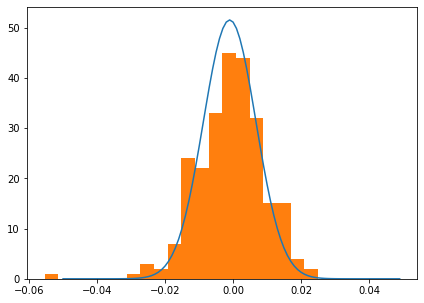

In [272]:
# Порівняємо гістограму для ефективності з нормальним розподілом...
# параметри нормального розподілу mu=Е(Ефективність), sigma=(Волатильність)**2
x_axis = np.arange(-0.05, 0.05, 0.001)

plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_daily,volatility_daily**2))
plt.hist(daily_data['Efficiency'], bins=20)
plt.show()

In [273]:
# Перейдемо до пошуку Value at Risk;
# Знайдемо для 95% та 99% рівнів значимості:
confidence_intervals = [0.95, 0.99]

VaR = [np.percentile(daily_data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
print(VaR)

[-0.01621316247695521, -0.02557176767868708]


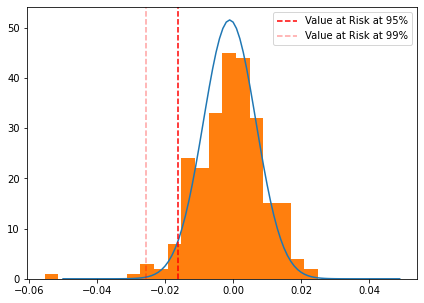

In [274]:
# Порівняння графіків та різні Value at Risk:
x_axis = np.arange(-0.05, 0.05, 0.001)

plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_daily,volatility_daily**2))
plt.hist(daily_data['Efficiency'], bins=20)
for _, interval in enumerate(confidence_intervals):
    plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
plt.legend()

Аналогічні дії для даних по місяцям:

Expected efficiency: 0.0
Volatility of efficiency: 0.144
Values at Risk - 95%, 99%: [-0.042268081851961924, -0.06440724901817729]


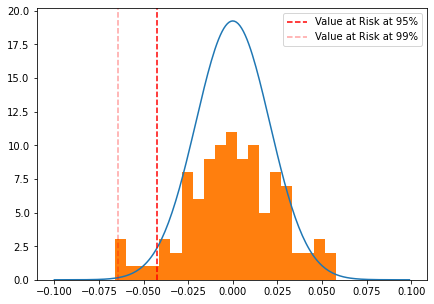

In [277]:
# Скомбінуємо всі команди в одну та подивимось фінальний результат:
weekly_data['Efficiency'] = (weekly_data[column] - weekly_data[column].shift(1)) / weekly_data[column]


expected_efficiency_weekly = np.round( weekly_data['Efficiency'].mean(), 3)
print("Expected efficiency:", expected_efficiency_weekly)

volatility_weekly = np.round ( 
                np.sqrt(
                    np.abs(
                        weekly_data["Efficiency"] - weekly_data["Efficiency"] ** 2).mean()
                        )
                    , 3)
print("Volatility of efficiency:", volatility_weekly)


confidence_intervals = [0.95, 0.99]
VaR = [np.percentile(weekly_data['Efficiency'][1:], 100 - _ * 100) for _ in confidence_intervals]
print(f"Values at Risk - 95%, 99%: {VaR}")

x_axis = np.arange(-0.1, 0.1, 0.001)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, norm.pdf(x_axis,expected_efficiency_weekly,volatility_weekly**2))
plt.hist(weekly_data['Efficiency'], bins=20)
for _, interval in enumerate(confidence_intervals):
    plt.axvline(VaR[_], color='r', alpha=1/np.exp(_), linestyle='dashed', label=f"Value at Risk at {interval:.0%}")
plt.legend()

In [278]:
# Таблиця з даними S&P500 для ефективності та волатильності:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility']
            )

,Daily,Weekly
Efficiency,-0.001,0.000
Volatility,0.088,0.144


Аналогічні дії виконаємо для інших фінансових інструментів: 
+ Акції - Amazon
+ Бонди - BND
+ Золото - Gold
+ Криптовалюти - BTC

### Amazon 

In [282]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="AMZN_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="AMZN_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,114.099998,114.959999,106.599998,106.900002,106.900002,67737300
1,2022-10-17,110.110001,114.190002,110.089996,113.790001,113.790001,62782000
2,2022-10-18,119.059998,119.519997,114.790001,116.360001,116.360001,65607400


Expected efficiency: 0.0
Volatility of efficiency: 0.133
Values at Risk - 95%, 99%: [-0.03690712339581437, -0.05461105650876616]


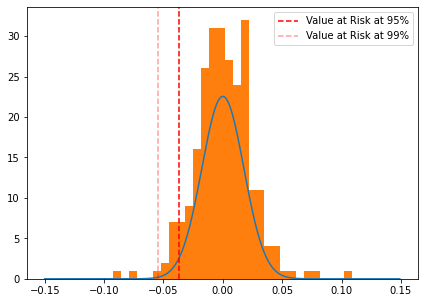

In [283]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=30, column='Adj Close')

Expected efficiency: -0.004
Volatility of efficiency: 0.202
Values at Risk - 95%, 99%: [-0.08696488274734901, -0.15316619908072387]


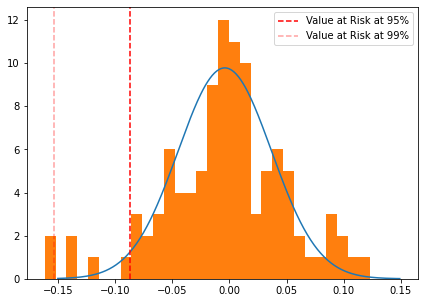

In [284]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=30, column='Adj Close')

In [285]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.000,-0.004
Volatility,0.133,0.202


### BND

In [286]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BND_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BND_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,70.820000,70.830002,70.089996,70.120003,68.062927,6544400
1,2022-10-17,70.550003,70.680000,70.269997,70.269997,68.208542,19605200
2,2022-10-18,70.459999,70.540001,70.139999,70.430000,68.363838,7008000


Expected efficiency: 0.0
Volatility of efficiency: 0.061
Values at Risk - 95%, 99%: [-0.006852391250136133, -0.008847091853684761]


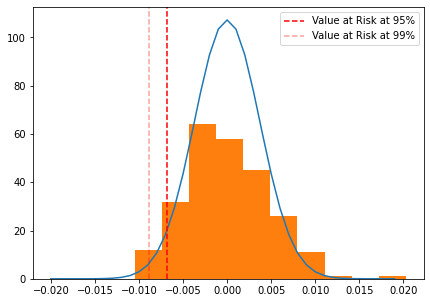

In [287]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=10, tail=0.02, column='Adj Close')

Expected efficiency: -0.001
Volatility of efficiency: 0.086
Values at Risk - 95%, 99%: [-0.0157128928541089, -0.017536038073596102]


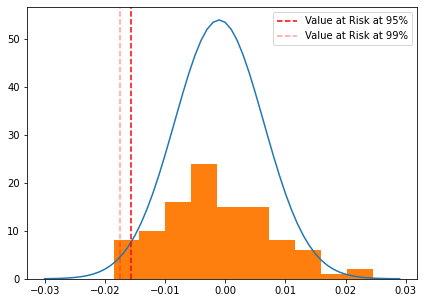

In [288]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=10, tail=0.03, column='Adj Close')

In [289]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.000,-0.001
Volatility,0.061,0.086


### Gold

In [290]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="Gold_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="Gold_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,2023-10-13,1877.5,1930.1,1877.5,1927.4,1927.4,46
1,2023-10-12,1874.7,1881.2,1867.0,1869.3,1869.3,46
2,2023-10-11,1869.5,1874.6,1869.1,1872.8,1872.8,65


Expected efficiency: -0.001
Volatility of efficiency: 0.08
Values at Risk - 95%, 99%: [-0.015686641057342462, -0.02724474347239699]


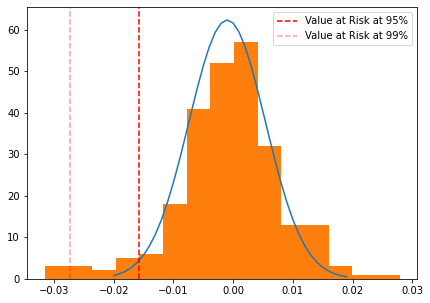

In [291]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=15, tail=0.02, column='Adj Close**')

Expected efficiency: -0.001
Volatility of efficiency: 0.122
Values at Risk - 95%, 99%: [-0.02896593148464985, -0.05582047327850501]


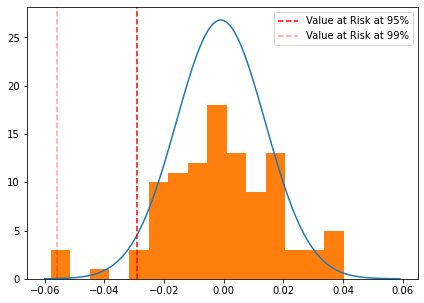

In [292]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=15, tail=0.06, column='Adj Close**')

In [293]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,-0.001,-0.001
Volatility,0.080,0.122


### Bitcoin

In [294]:
daily_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BTC_1Y_Daily")
weekly_data = pd.read_excel("Assignment1_Data.xlsx", sheet_name="BTC_2Y_Weekly")
daily_data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-14,19382.533203,19889.146484,19115.408203,19185.656250,19185.656250,38452356727
1,2022-10-15,19185.437500,19212.541016,19019.250000,19067.634766,19067.634766,16192235532
2,2022-10-16,19068.914063,19389.603516,19068.914063,19268.093750,19268.093750,17988916650


Expected efficiency: 0.001
Volatility of efficiency: 0.124
Values at Risk - 95%, 99%: [-0.03192732069615853, -0.058925864088545]


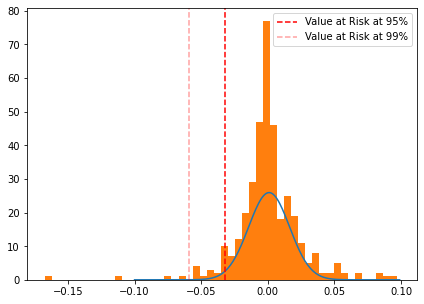

In [295]:
expected_efficiency_daily, volatility_daily = display_info(daily_data, bins=50, tail=0.10, column='Adj Close')

Expected efficiency: -0.011
Volatility of efficiency: 0.235
Values at Risk - 95%, 99%: [-0.12945479552868383, -0.27690880462283257]


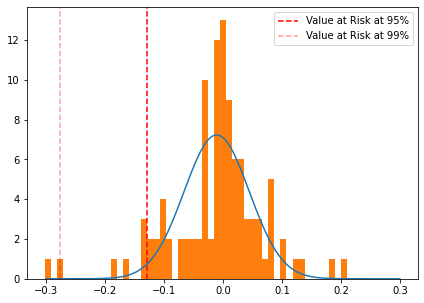

In [296]:
expected_efficiency_weekly, volatility_weekly = display_info(weekly_data, bins=50, tail=0.30, column='Adj Close')

In [297]:
pd.DataFrame(data=[[expected_efficiency_daily, expected_efficiency_weekly], 
                   [volatility_daily, volatility_weekly]], 
             columns=['Daily', 'Weekly'],
             index=['Efficiency', 'Volatility'])

,Daily,Weekly
Efficiency,0.001,-0.011
Volatility,0.124,0.235


### Висновки

1. Гістограми для даних по дням та місяцям будуть відрізнятися; усі активи схильні збільшувати свою волатильність при переході від днів до тижнів при незмінній середній ефективності. Середнє значення усіх інструментів коливається близько 0, тому не можна говорити по однозначну "дохідність" певного інструмента.
2. Оцінки для параметрів нормального розподілу як значення середньої ефективності та волатильності виглядають достатньо точними; гістограма повторює нормальний розподіл.
3. Оскільки ефективність (аналог дохідності) коливається близько 0, можемо зробити висновок по надійності активів; бонди (боргові інструменти) виявилися найменш волатильними, що є логічним результатом; S&P500 та золото мають схожі параметри, при цьому S&P500 є менш волатильною за акції Amazon: теж логічний результат, оскільки у випадку S&P500 маємо справу з диверсифікацією, адже розглядаємо не одну, а 500 компаній. Криптовалюти, як і очікувалося, є найбільш волатильними.